In [1]:
import numpy as np #linear alg
import pandas as pd #data processing
import seaborn as sns
import re
from collections import defaultdict

In [2]:
#point to files/datasets
import os 
print(os.listdir('/Users/clairekraft/Desktop/Python/Data/Data Science Datasets'))

['fulltimeLA.csv', 'UK.csv', 'fulltimeCHI.csv', 'fulltimeNY.csv', 'fulltimeBO.csv', 'fulltimeAT.csv', 'fulltimeMA.csv', 'fulltimeMV.csv', 'fulltimeSU.csv', 'fulltimeSF.csv', 'fulltimeSEA.csv', 'fulltimeSD.csv', 'fulltimeRM.csv', 'fulltimeDC.csv', 'USA.csv', 'fulltimeAL.csv', 'fulltimeBOS.csv']


In [3]:
#import all US data
data_us = pd.read_csv('/Users/clairekraft/Desktop/Python/Data/Data Science Datasets/USA.csv')
#now UK
data_uk = pd.read_csv('/Users/clairekraft/Desktop/Python/Data/Data Science Datasets/UK.csv')

In [4]:
select_data_us = data_us[["position","description"]]
select_data_uk = data_uk[["job_title","job_description"]]
#rename UK columns
select_data_uk = select_data_uk.rename(index=str, columns={"job_title": "position", "job_description": "description"})

In [5]:
#concatenate resulting dataframes
select_dat = pd.concat([select_data_us,select_data_uk],axis=0)
#convert to strings
select_dat = select_dat.applymap(str)
#replace certain strings
select_dat["description"] = select_dat["description"].replace(to_replace='Apply', value="",regex=True)
select_dat["description"] = select_dat["description"].replace(to_replace='apply', value="",regex=True)
select_dat["description"] = select_dat["description"].replace(to_replace='now', value="",regex=True)
select_dat["description"] = select_dat["description"].replace(to_replace='apply now', value="",regex=True)
select_dat["description"] = select_dat["description"].replace(to_replace='Apply Now', value="",regex=True)
select_dat["description"] = select_dat["description"].replace(to_replace='Job Description', value="",regex=True)
select_dat["description"] = select_dat["description"].replace(to_replace='job description', value="",regex=True)
select_dat["description"] = select_dat["description"].replace(to_replace='changes everything', value="",regex=True)
select_dat["description"] = select_dat["description"].replace(to_replace='everything', value="",regex=True)
select_dat["description"] = select_dat["description"].replace(to_replace='data scientist', value="Data Scientist",regex=True)

In [6]:
#Did it concat? Let's see the preview.
select_dat.head()

,position,description
0,Development Director,Development Director\nALS Therapy Development ...
1,An Ostentatiously-Excitable Principal Research...,"\n\n""The road that leads to accomplishment is ..."
2,Data Scientist,"Growing company located in the Atlanta, GA are..."
3,Data Analyst,DEPARTMENT: Program OperationsPOSITION LOCATIO...
4,Assistant Professor -TT - Signal Processing & ...,DESCRIPTION\nThe Emory University Department o...


In [7]:
select_dat.shape

(56964, 2)

In [8]:
#I'm a Data Analyst (DA), so let's peek the DA postings from the listings.
Analyst = select_dat[select_dat['position'].str.contains("Data Analyst")] 
Analyst.head()

,position,description
3,Data Analyst,DEPARTMENT: Program OperationsPOSITION LOCATIO...
100,Enterprise Data Analyst & Data Engineer,Role Overview\n\nNovelis is embarking on the j...
287,Data Analyst - Public Education Data Analysis,General Information\n**Minimum salary is liste...
298,Data Analyst,\nMake a Difference Every Day with Team Applie...
333,Quantitative Data Analyst,PIMCO is a global investment solutions provide...


In [9]:
#Data Scientists?
Scientist = select_dat[select_dat['position'].str.contains("Data Scientist")] 
Scientist.head()

,position,description
2,Data Scientist,"Growing company located in the Atlanta, GA are..."
9,Senior Associate - Cognitive Data Scientist Na...,Kn for being a great place to work and build a...
12,"Senior Associate, Data Scientist",Innovate. Collaborate. Shine. Lighthouse — KPM...
15,Data Scientist,Cotiviti is looking for an industry leading Da...
18,Data Scientist,DATA SCIENTIST\n\nSUMMARY:\nAs an Amazon Web S...


In [10]:
#ML? What a flex.
ML = select_dat[select_dat['position'].str.contains("Machine Learning")] 
ML.head()

,position,description
4,Assistant Professor -TT - Signal Processing & ...,DESCRIPTION\nThe Emory University Department o...
63,Machine Learning / Artificial Intelligence Res...,(This is an Individual Contributor Role)\n\nCo...
79,"Technical Evangelist – Database, Analytics, an...",\nDo you love data? Do you like getting people...
122,Mid Data Scientist - Machine Learning,Mid Data Scientist\nOur client in the Midtown ...
133,Tech Fall 2018 Intern - Machine Learning,The Turner Story\n\nTurner is a division of Ti...


In [11]:
#Fancy people
BD = select_dat[select_dat['position'].str.contains("Big Data")] 
BD.head()

,position,description
124,Big Data SW Engineer,Kn for being a great place to work and build a...
136,Data Analytics Engineer / Big Data Engineer,"5 years of hands on experience in Hadoop, HDFS..."
160,Big Data Engineer (mid to senior level),:\nGreenSky is a leading company in the consum...
407,Big Data Pipeline Software Engineer - Java/Scala,All data has a story to tell Can you help tell...
417,Senior Director of Big Data Science & Analytics,Job description\n\nPosition Purpose:\nProvide ...


In [12]:
#pip install wordcloud

In [13]:
#import the wordcloud package
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#define the word cloud function with a max of 200 words
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(10,10), 
                   title = None, title_size=20, image_color=False):
    stopwords = set(STOPWORDS)
    #define additional stop words that are not contained in the dictionary
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)
    #generate the word cloud
    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    #set the plot parameters
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
#n-gram func
def ngram_extractor(text, n_gram):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

#func to generate a dataframe with n_gram and top max_row frequencies
def generate_ngrams(df, n_gram, max_row):
    temp_dict = defaultdict(int)
    for question in df:
        for word in ngram_extractor(question, n_gram):
            temp_dict[word] += 1
    temp_df = pd.DataFrame(sorted(temp_dict.items(), key=lambda x: x[1])[::-1]).head(max_row)
    temp_df.columns = ["word", "wordcount"]
    return temp_df

#func to construct side by side comparison plots
def comparison_plot(df_1,df_2,col_1,col_2, space):
    fig, ax = plt.subplots(1, 2, figsize=(20,10))
    
    sns.barplot(x=col_2, y=col_1, data=df_1, ax=ax[0], color="royalblue")
    sns.barplot(x=col_2, y=col_1, data=df_2, ax=ax[1], color="royalblue")

    ax[0].set_xlabel('Word count', size=14)
    ax[0].set_ylabel('Words', size=14)
    ax[0].set_title('Top 20 Bi-grams in Descriptions', size=18)

    ax[1].set_xlabel('Word count', size=14)
    ax[1].set_ylabel('Words', size=14)
    ax[1].set_title('Top 20 Tri-grams in Descriptions', size=18)

    fig.subplots_adjust(wspace=space)
    
    plt.show()

In [14]:
#select descriptions from DA
Analyst_desc = Analyst["description"]
Analyst_desc.replace('--', np.nan, inplace=True) 
Analyst_desc_na = Analyst_desc.dropna()
#convert list elements to lower case
Analyst_desc_na_cleaned = [item.lower() for item in Analyst_desc_na]
#remove html links from the list 
Analyst_desc_na_cleaned =  [re.sub(r"http\S+", "", item) for item in Analyst_desc_na_cleaned]
#remove special characters
Analyst_desc_na_cleaned = [re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", item) for item in Analyst_desc_na_cleaned]
#convert to dataframe
Analyst_desc_na_cleaned = pd.DataFrame(np.array(Analyst_desc_na_cleaned).reshape(-1))
#squeeze dataframe to obtain series
Analyst_cleaned = Analyst_desc_na_cleaned.squeeze()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


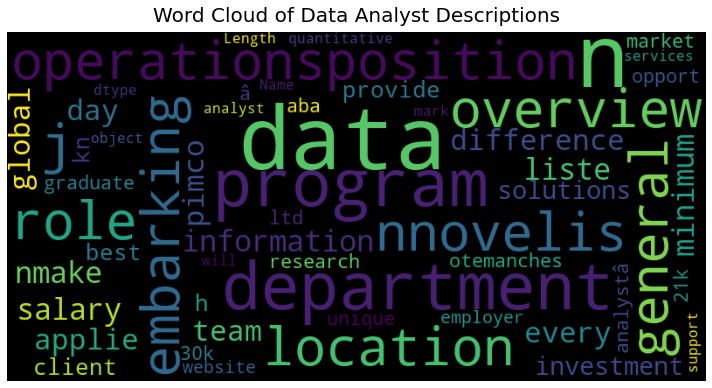

In [15]:
#DA workcloud
plot_wordcloud(Analyst_cleaned, title="Word Cloud of Data Analyst Descriptions")

In [16]:
#select descriptions from DS
Scientist_desc = Scientist["description"]
Scientist_desc.replace('--', np.nan, inplace=True) 
Scientist_desc_na = Scientist_desc.dropna()
#convert list elements to lower case
Scientist_desc_na_cleaned = [item.lower() for item in Scientist_desc_na]
#remove html links from the list 
Scientist_desc_na_cleaned =  [re.sub(r"http\S+", "", item) for item in Scientist_desc_na_cleaned]
#remove special characters 
Scientist_desc_na_cleaned = [re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", item) for item in Scientist_desc_na_cleaned]
#convert to dataframe
Scientist_desc_na_cleaned = pd.DataFrame(np.array(Scientist_desc_na_cleaned).reshape(-1))
#squeeze dataframe to obtain series
Scientist_cleaned = Scientist_desc_na_cleaned.squeeze()

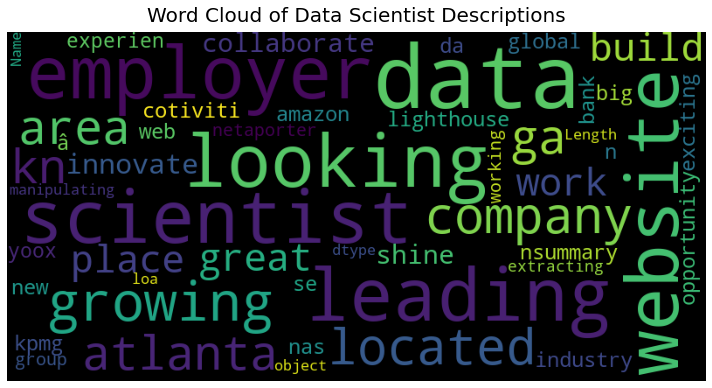

In [17]:
#DS wordcloud
plot_wordcloud(Scientist_cleaned, title="Word Cloud of Data Scientist Descriptions")

In [18]:
#select descriptions from ML
ML_desc = ML["description"]
ML_desc.replace('--', np.nan, inplace=True) 
ML_desc_na = ML_desc.dropna()
#convert list elements to lower case
ML_desc_na_cleaned = [item.lower() for item in ML_desc_na]
#remove html links from the list 
ML_desc_na_cleaned =  [re.sub(r"http\S+", "", item) for item in ML_desc_na_cleaned]
#remove special characters
ML_desc_na_cleaned = [re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", item) for item in ML_desc_na_cleaned]
#convert to dataframe
ML_desc_na_cleaned = pd.DataFrame(np.array(ML_desc_na_cleaned).reshape(-1))
#squeeze dataframe to obtain series
ML_cleaned = ML_desc_na_cleaned.squeeze()

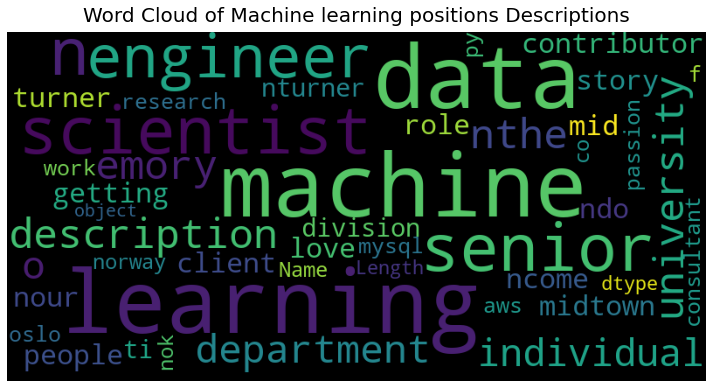

In [19]:
#ML
plot_wordcloud(ML_cleaned, title="Word Cloud of Machine learning positions Descriptions")

In [20]:
#select descriptions from BD
BD_desc = BD["description"]
BD_desc.replace('--', np.nan, inplace=True) 
BS_desc_na = BD_desc.dropna()
#convert list elements to lower case
BD_desc_na_cleaned = [item.lower() for item in BS_desc_na]
#remove html links from the list 
BD_desc_na_cleaned =  [re.sub(r"http\S+", "", item) for item in BD_desc_na_cleaned]
#remove special characters
BD_desc_na_cleaned = [re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", item) for item in BD_desc_na_cleaned]
#convert to dataframe
BD_desc_na_cleaned = pd.DataFrame(np.array(BD_desc_na_cleaned).reshape(-1))
#squeeze dataframe to obtain series
BD_cleaned = BD_desc_na_cleaned.squeeze()

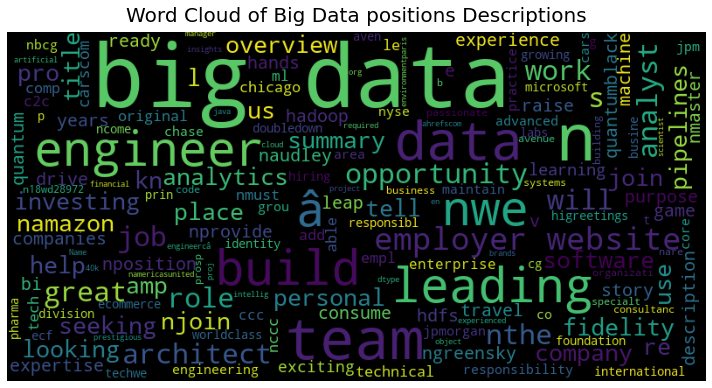

In [21]:
#BD
plot_wordcloud(BD_cleaned, title="Word Cloud of Big Data positions Descriptions")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


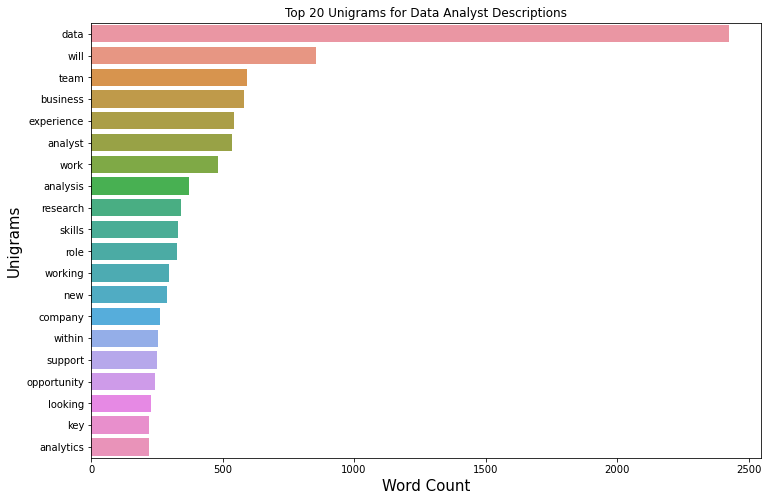

In [22]:
#N-Gram analysis- N-grams are continuous sequences of words or symbols or tokens in a document. 
#In technical terms, they can be defined as the neighbouring sequences of items in a document. 
#They come into play when we deal with text data in NLP(Natural Language Processing) tasks.

#generate unigram for DA
Analyst_1gram = generate_ngrams(Analyst_cleaned, 1, 20)
#generate barplot for unigram
plt.figure(figsize=(12,8))
sns.barplot(Analyst_1gram["wordcount"],Analyst_1gram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Unigrams", fontsize=15)
plt.title("Top 20 Unigrams for Data Analyst Descriptions")
plt.show()

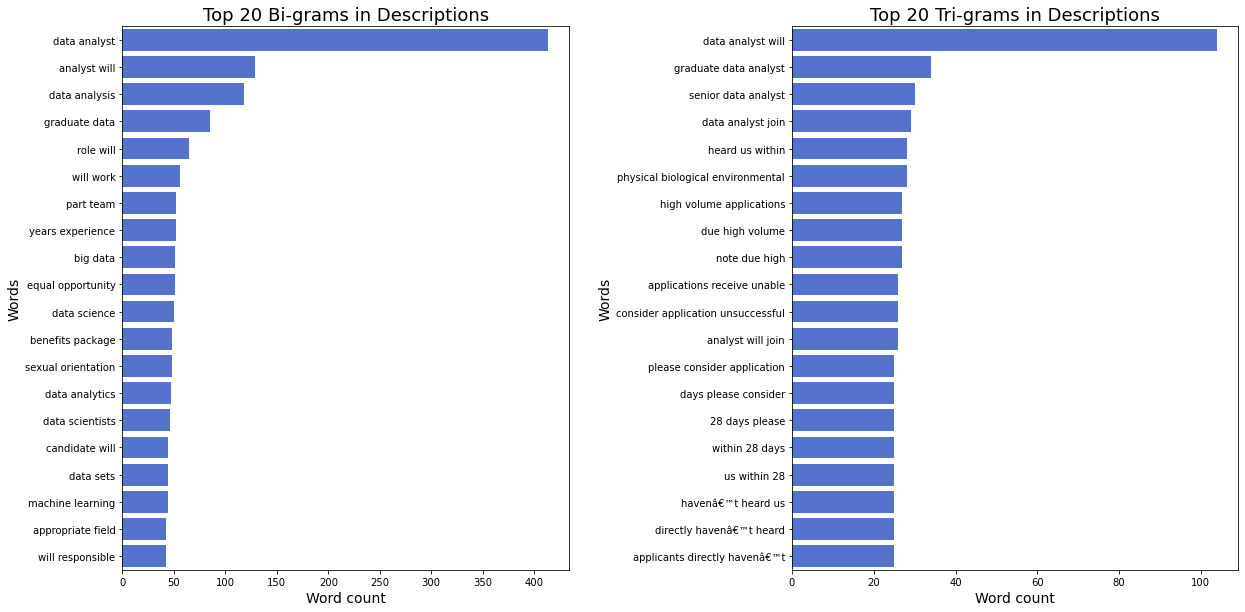

In [23]:
#bi-grams and tri-grams (Top 20)
Analyst_2gram = generate_ngrams(Analyst_cleaned, 2, 20)
Analyst_3gram = generate_ngrams(Analyst_cleaned, 3, 20)
#compare the bar plots
comparison_plot(Analyst_2gram,Analyst_3gram,'word','wordcount', 0.5)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


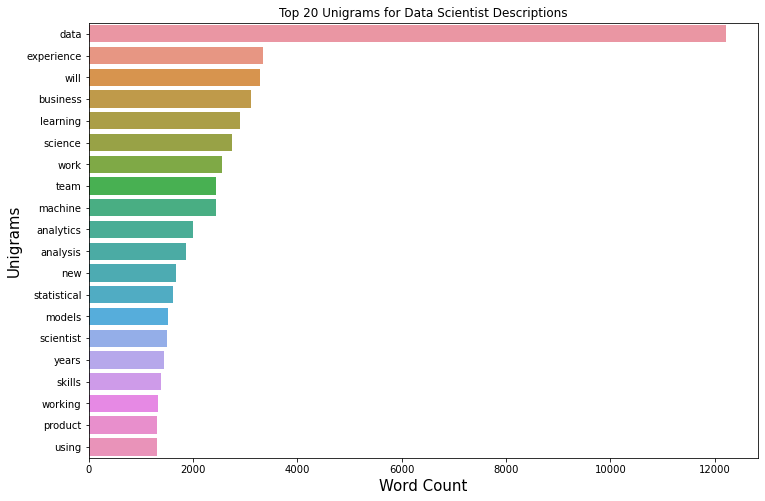

In [24]:
#generate unigram for DS
Scientist_1gram = generate_ngrams(Scientist_cleaned, 1, 20)
#generate barplot for unigram
plt.figure(figsize=(12,8))
sns.barplot(Scientist_1gram["wordcount"],Scientist_1gram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Unigrams", fontsize=15)
plt.title("Top 20 Unigrams for Data Scientist Descriptions")
plt.show()

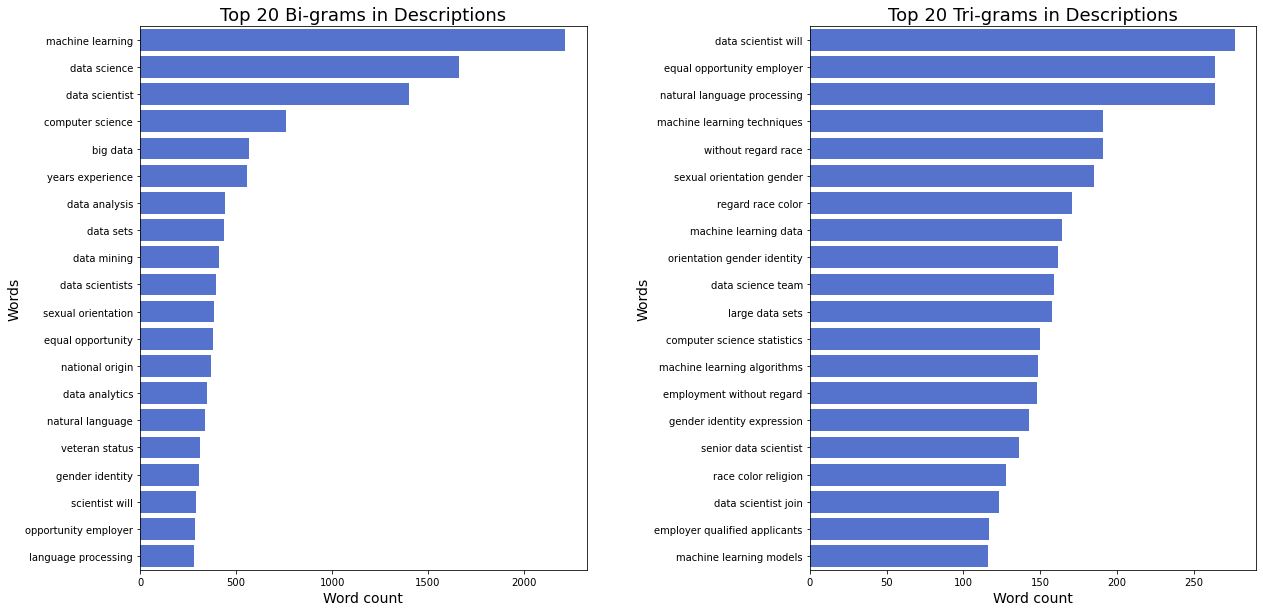

In [25]:
#bi-grams and tri-grams (Top 20)
Scientist_2gram = generate_ngrams(Scientist_cleaned, 2, 20)
Scientist_3gram = generate_ngrams(Scientist_cleaned, 3, 20)
#compare the bar plots
comparison_plot(Scientist_2gram,Scientist_3gram,'word','wordcount', 0.5)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


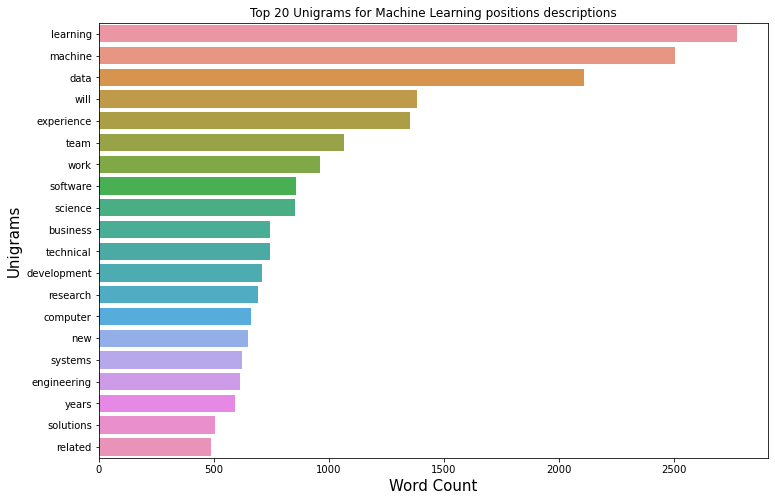

In [26]:
#generate unigram for ML
Scientist_1gram = generate_ngrams(ML_cleaned, 1, 20)
#generate barplot for unigram
plt.figure(figsize=(12,8))
sns.barplot(Scientist_1gram["wordcount"],Scientist_1gram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Unigrams", fontsize=15)
plt.title("Top 20 Unigrams for Machine Learning positions descriptions")
plt.show()

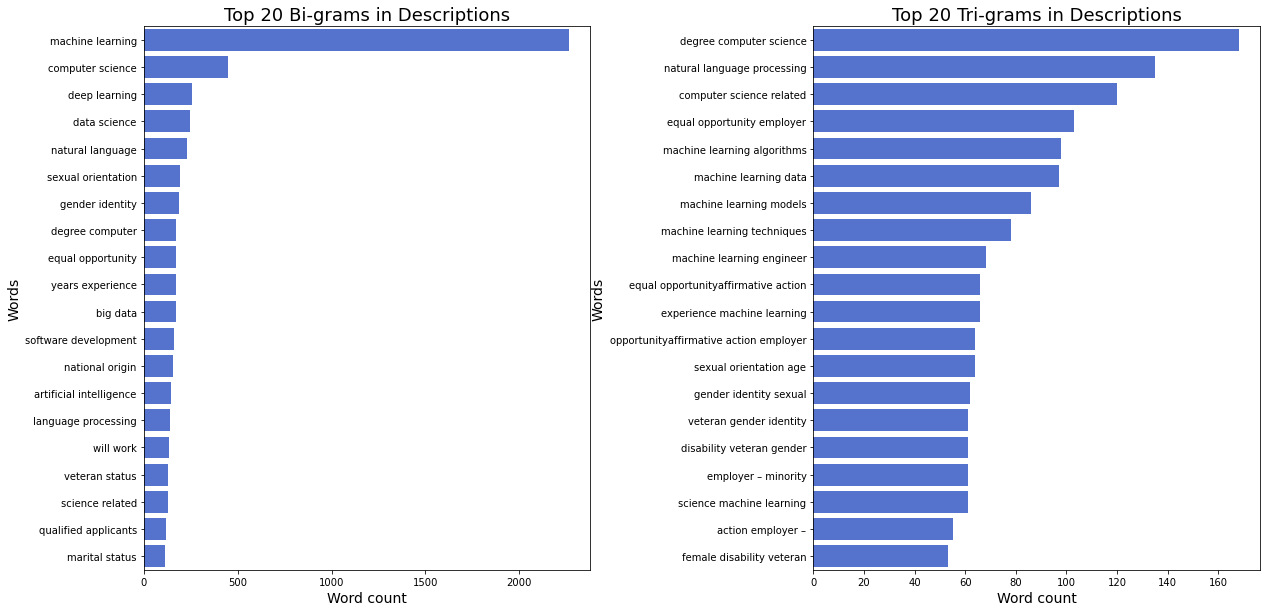

In [27]:
#bi-grams and tri-grams (Top 20)
ML_2gram = generate_ngrams(ML_cleaned, 2, 20)
ML_3gram = generate_ngrams(ML_cleaned, 3, 20)
#compare the bar plots
comparison_plot(ML_2gram,ML_3gram,'word','wordcount', 0.5)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


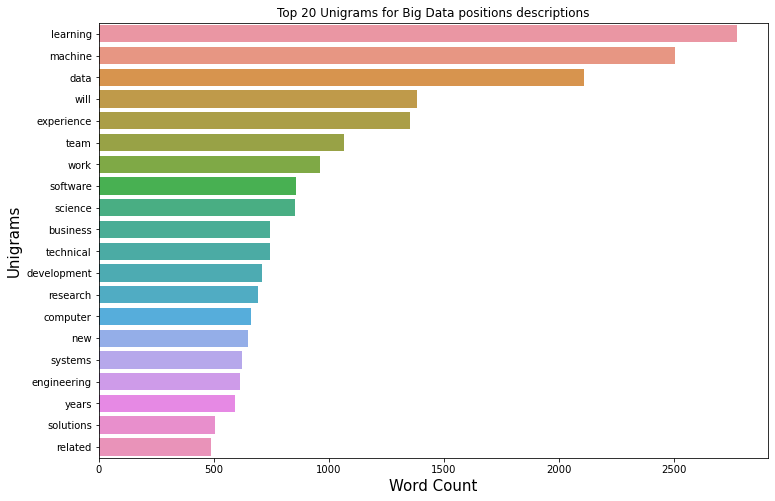

In [28]:
#generate unigram for BD
BD_1gram = generate_ngrams(BD_cleaned, 1, 20)
#generate barplot for unigram
plt.figure(figsize=(12,8))
sns.barplot(Scientist_1gram["wordcount"],Scientist_1gram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Unigrams", fontsize=15)
plt.title("Top 20 Unigrams for Big Data positions descriptions")
plt.show()

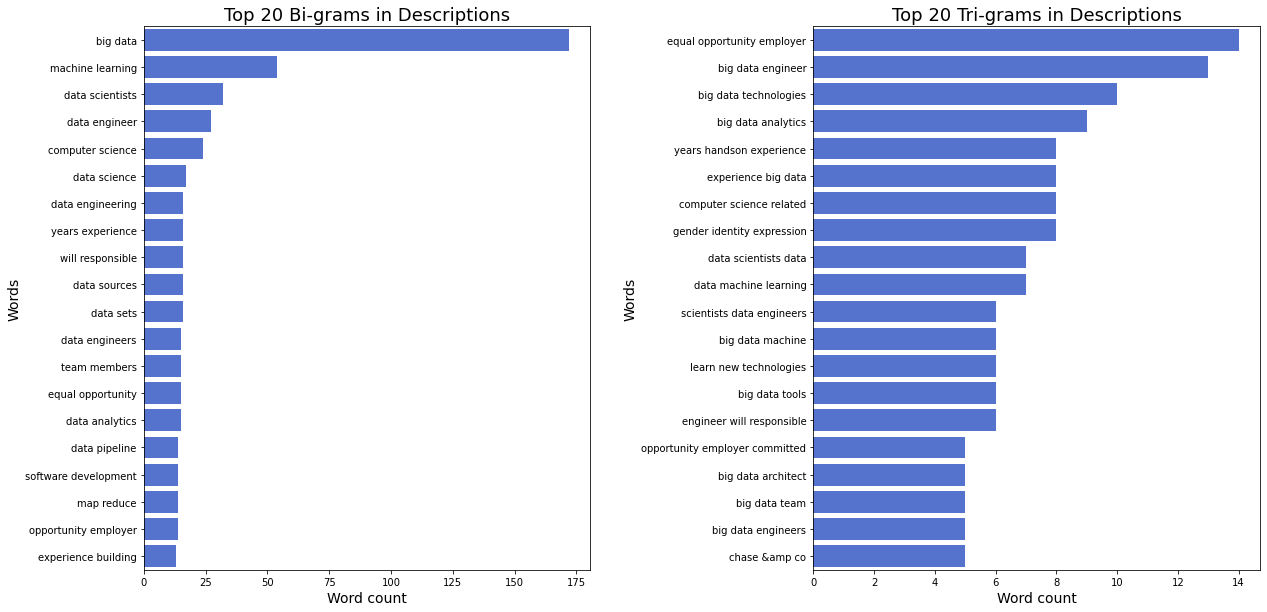

In [29]:
#bi-grams and tri-grams (Top 20)
BD_2gram = generate_ngrams(BD_cleaned, 2, 20)
BD_3gram = generate_ngrams(BD_cleaned, 3, 20)
#compare the bar plots
comparison_plot(BD_2gram,BD_3gram,'word','wordcount', 0.5)

In [30]:
#Here's how the Data Science industry looks

#Data Analyst positions - (entry level position)
#Skills- knowledge of data science, big data, analytics, and machine learning. 
#May I add we need to be good translators, we must be able to translate numbers into a compelling
#narrative to our stakeholders. We accompany our storytelling with aesthetic visuals. Somethings that 
#is unaccounted for in this EDA is "problem solving". Of course problem solving is across all domains in data 
#science.

In [31]:
#Data Scientist positions- (Business focused role)
#skills- knowledge of statistical and machine learning models
#similar to the Data Analysts, Data Scientists have to use skills across the fields 
#of data mining, big data, analysis and machine learning.

In [32]:
#Machine Learning positions - (Engineering focused role) 
#Education- computer science degree 
#Sklills- deep learning, software development, language processing, and artificial intelligence

In [33]:
#Big Data positions - (Data Management role- highly technical)
#The definition of big data is data that contains greater variety, arriving in increasing volumes 
#and with more velocity. 
#This is also known as the three Vs.
#Put simply, big data is larger, more complex data sets, especially from new data sources. 
#These data sets are so voluminous that traditional data processing software just can’t manage them. 
#But these massive volumes of data can be used to address business 
#problems you wouldn’t have been able to tackle before.

#source Oracle